# Project 7
## Author: Sarah Howard
## Github Repository:  https://github.com/sapapesh/datafun-07-ml

In [689]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

### Linear Relationships

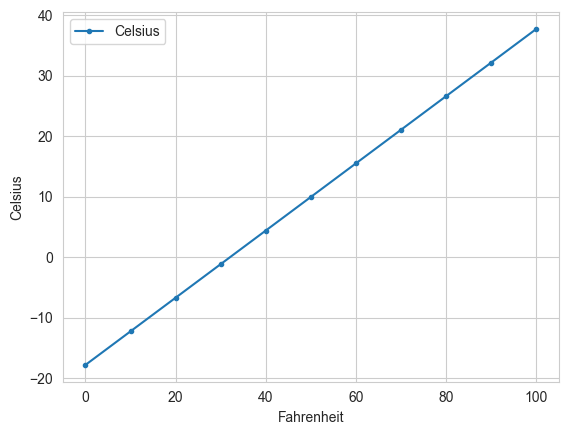

In [690]:
c = lambda f: 5 / 9* (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
Recommended: Rather than nyc, name the dataframe nyc_df to reinforce the DataFrame operations.
Recommended: Add all imports to the top of your file, just under the Markdown Introduction. Follow conventions. 

In [691]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
Follow the instructions to view head and tail of the file. 

In [692]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [693]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Follow the instructions to clean the data. Improve the column names and clean up the date series. 

In [694]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [695]:
nyc_df.Date.dtype

dtype('int64')

In [696]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
 Set the display precision to 2 decimal places. Use 'display.precision' instead of 'precision' as shown in the text.
Use describe() to calculate basic descriptive statistics for the dataset

In [697]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
Recommended: Add all imports to the top of your file, just under the Markdown Introduction. Follow conventions. 

In [698]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [699]:
linear_regression.slope

0.014771361132966163

In [700]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict
Use your model to predict the "average high temp in Jan" for the year 2024 (just like they did for 2019).

In [701]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations
Follow the instructions and use Seaborn to generate a scatter plot with a best fit line.
Set the axes and the y scale as directed
Customize your chart and notebook as you like to make your work clear and compelling. 

(10.0, 70.0)

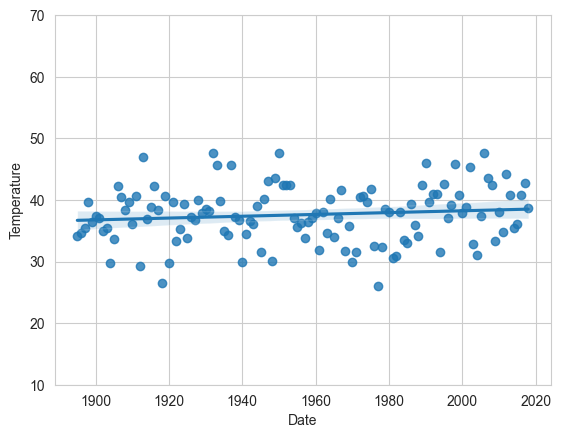

In [702]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model
Use test_train_split to split the data into parts for training and testing.
Recommended: Add all imports to the top of your file, just under the Markdown Introduction. Follow conventions. 
Check the shape of each data set.
Train the model using Linear Regression Fit. 
View the returned coef_ and intercept_  attributes need for the line equation (y = mx + b)

In [703]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature, random_state=11)

X_train.shape


(93, 1)

In [704]:
X_test.shape

(31, 1)

In [705]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [706]:
m = linear_regression.coef_
m

array([0.01939167])

In [707]:
b = linear_regression.intercept_
b

-0.30779820252656975

In [708]:
print(f'The linear regression equation is y = {m}x + {b}.') 

The linear regression equation is y = [0.01939167]x + -0.30779820252656975.


### Section 2 - Test the Model
Test the model as directed.

In [709]:
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:20]

array([37.85501484, 36.47820604, 37.93258153, 36.61394775, 36.74968946,
       38.68885679, 36.43942269, 37.13752293, 37.62231476, 37.5253564 ,
       37.00178122, 38.320415  , 37.19569795, 38.45615671, 36.55577273,
       37.25387297, 38.18467329, 37.89379819, 38.14588994, 38.63068177])

In [710]:
expected[:20]

73     31.7
2      35.5
77     40.5
9      29.8
16     40.7
116    34.8
0      34.2
36     38.2
61     36.2
56     42.5
29     39.4
97     40.9
39     39.8
104    40.8
6      37.0
42     45.7
90     33.0
75     29.9
88     38.0
113    42.4
Name: Temperature, dtype: float64

### Section 3 - Predict 
Use your model to predict the "average high temp in Jan" for the year 2024 (like they did for 2019).

In [711]:
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations
Follow the instructions and use Seaborn to generate a scatter plot with a best fit line.
Set the axes and the y scale as directed
Customize your chart and notebook as you like to make your work clear and compelling. 

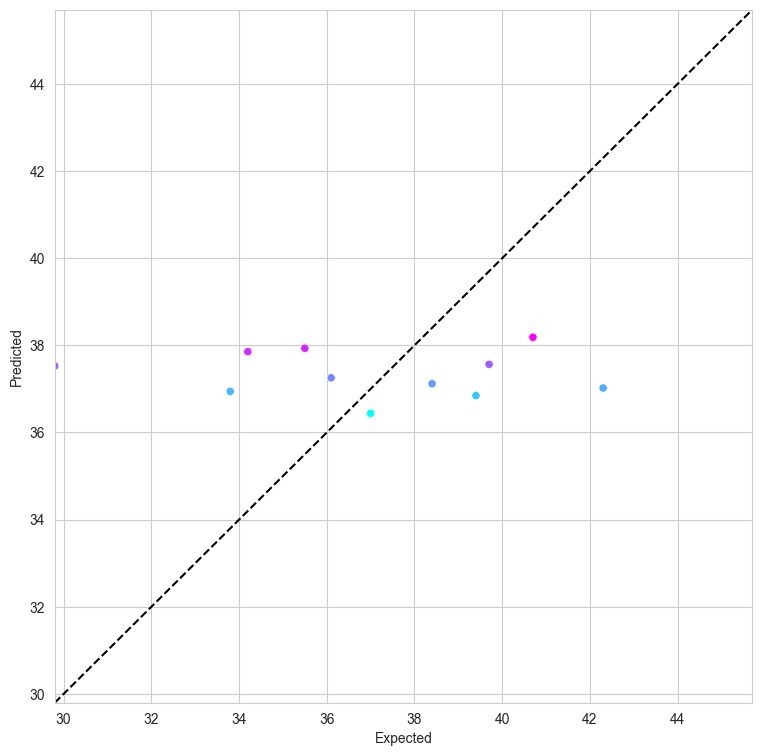

In [712]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start,end)

line = plt.plot([start, end], [start, end], 'k--')
